# Visualisation des données

In [2]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
# lecture de l'image dans une matrice numpy 
im_yes = cv2.imread("../data_set/train/yes/y_10.jpg")

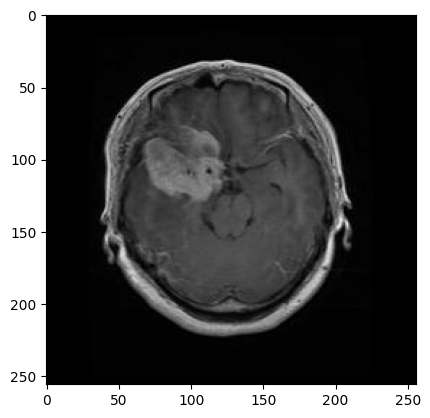

In [3]:
# Convertir BGR (OpenCV) en RGB (Matplotlib)
im_yes_rgb = cv2.cvtColor(im_yes, cv2.COLOR_BGR2RGB)

# Afficher l'image
plt.imshow(im_yes_rgb)
plt.show()


Text(0.5, 1.0, 'Canal Bleu')

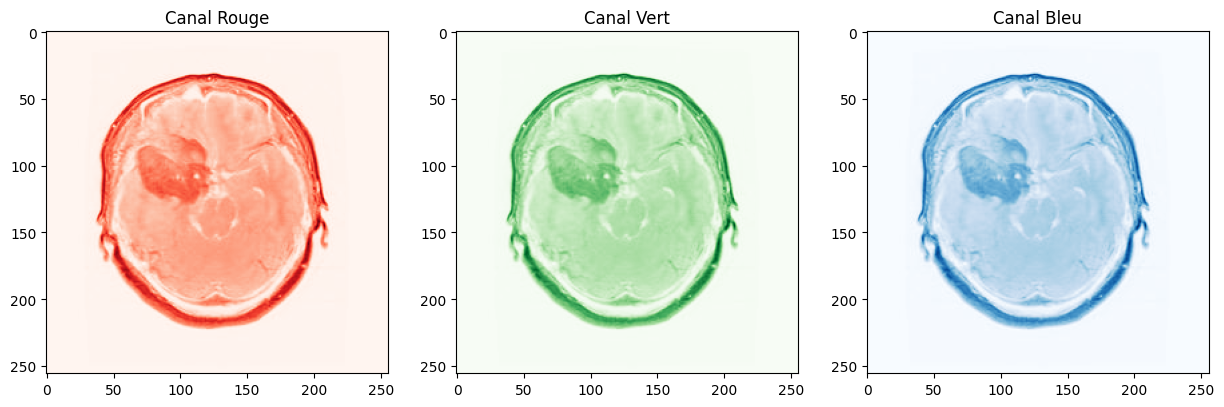

In [4]:
# voyons à quoi ressemble l'image pixel par pixel
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Affichage des trois canaux séparés
ax[0].imshow(im_yes_rgb[:, :, 0], cmap='Reds')  
ax[0].set_title('Canal Rouge')
ax[1].imshow(im_yes_rgb[:, :, 1], cmap='Greens')  
ax[1].set_title('Canal Vert')
ax[2].imshow(im_yes_rgb[:, :, 2], cmap='Blues') 
ax[2].set_title('Canal Bleu')

# Nous allons observer les dimensions 

In [5]:
print(type(im_yes))   # type de l'image 
print(im_yes.shape)    # dimension 
im_yes[:,:, 1] # Le premier pixel

<class 'numpy.ndarray'>
(256, 256, 3)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Les dimensions de cette image ne sont pas celles courantes 128x128, 224x224, 256x256, etc

Voyons la taille des toutes les images dans le data_set

In [6]:
def process_and_display_images(folder_path):
    # Liste tous les fichiers du dossier
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg','.jpeg','.png' '.JPG'))]
    
    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        
        # Lecture de l'image
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Erreur: Impossible de lire le fichier {img_file}.")
            continue
        
        # Afficher les dimensions de l'image
        print(f"Image: {img_file} - Dimensions: {img.shape}")


In [7]:
# Chemin vers le dossier contenant les images
folder_path = "../data_set/all_data/yes"
process_and_display_images(folder_path)

Image: y_56.jpg - Dimensions: (256, 256, 3)
Image: y_155.jpg - Dimensions: (256, 256, 3)
Image: y_101.jpg - Dimensions: (256, 256, 3)
Image: y_160.jpg - Dimensions: (256, 256, 3)
Image: y_74.jpg - Dimensions: (256, 256, 3)
Image: y_148.jpg - Dimensions: (256, 256, 3)
Image: y_147.jpg - Dimensions: (256, 256, 3)
Image: y_71.jpg - Dimensions: (256, 256, 3)
Image: y_48.jpg - Dimensions: (256, 256, 3)
Image: y_73.jpg - Dimensions: (256, 256, 3)
Image: y_89.jpg - Dimensions: (256, 256, 3)
Image: y_66.jpg - Dimensions: (256, 256, 3)
Image: y_106.jpg - Dimensions: (256, 256, 3)
Image: y_100.jpg - Dimensions: (256, 256, 3)
Image: y_169.jpg - Dimensions: (256, 256, 3)
Image: y_88.jpg - Dimensions: (256, 256, 3)
Image: y_105.jpg - Dimensions: (256, 256, 3)
Image: y_17.jpg - Dimensions: (256, 256, 3)
Image: y_165.jpg - Dimensions: (256, 256, 3)
Image: y_15.jpg - Dimensions: (256, 256, 3)
Image: y_19.jpg - Dimensions: (256, 256, 3)
Image: y_118.jpg - Dimensions: (256, 256, 3)
Image: y_1.jpg - Dime

In [8]:
# Chemin vers le dossier contenant les images
folder_path = "../data_set/all_data/no"
process_and_display_images(folder_path)

Image: n_73.jpg - Dimensions: (256, 256, 3)
Image: n_160.jpg - Dimensions: (256, 256, 3)
Image: n_62.jpg - Dimensions: (256, 256, 3)
Image: n_22.jpg - Dimensions: (256, 256, 3)
Image: n_155.jpg - Dimensions: (256, 256, 3)
Image: n_21.jpg - Dimensions: (256, 256, 3)
Image: n_75.jpg - Dimensions: (256, 256, 3)
Image: n_152.jpg - Dimensions: (256, 256, 3)
Image: n_122.jpg - Dimensions: (256, 256, 3)
Image: n_134.jpg - Dimensions: (256, 256, 3)
Image: n_120.jpg - Dimensions: (256, 256, 3)
Image: n_86.jpg - Dimensions: (256, 256, 3)
Image: n_89.jpg - Dimensions: (256, 256, 3)
Image: n_29.jpg - Dimensions: (256, 256, 3)
Image: n_65.jpg - Dimensions: (256, 256, 3)
Image: n_19.jpg - Dimensions: (256, 256, 3)
Image: n_137.jpg - Dimensions: (256, 256, 3)
Image: n_167.jpg - Dimensions: (256, 256, 3)
Image: n_104.jpg - Dimensions: (256, 256, 3)
Image: n_60.jpg - Dimensions: (256, 256, 3)
Image: n_143.jpg - Dimensions: (256, 256, 3)
Image: n_51.jpg - Dimensions: (256, 256, 3)
Image: n_165.jpg - Dim

Les images n'ont pas les memes dimensiosn du tout, rien à voir les uns des autres

Ici nous avons plusieurs choix parmi lesquels :
1. Redimensionnement (Resizing)
2. Centrer et recadrer l'image (Cropping)
3. Complétion de l'image avec un fond (Padding)

Nous choisirons de faire avec la premiere car les deux dernieres peuvent induire de grande perte d'information

Mais avant celà nous allons renommé les données qui sembles completement mal nommé sans aucun ordre ni convention de nommage.

In [7]:
def rename_and_convert_images(folder_path, prefix="image_"):
    """
    Renomme et convertit toutes les images dans un dossier au format .jpg avec un préfixe personnalisé.
    
    Args:
    - folder_path : str : Le chemin du dossier contenant les images à traiter.
    - prefix : str : Le préfixe à ajouter au nom de chaque image convertie. Par défaut "image_".
    """
    # Liste des fichiers triés dans le dossier
    image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg','.JPG', '.jpeg', '.png'))])
    
    # Renommer et convertir les fichiers
    for i, image_file in enumerate(image_files, start=1):
        # Créer le chemin complet du fichier
        old_path = os.path.join(folder_path, image_file)
        
        # Ouvrir l'image avec PIL
        with Image.open(old_path) as img:
            # Créer un nouveau nom pour l'image avec l'extension .jpg et le préfixe donné
            new_name = f"{prefix}{i}.jpg"  # Nouveau nom avec le préfixe (ex : y_1.jpg, n_2.jpg, ...)
            new_path = os.path.join(folder_path, new_name)
            
            # Convertir l'image au format JPG (si nécessaire) et enregistrer avec le nouveau nom
            img.convert('RGB').save(new_path, 'JPEG')

        # Afficher le changement de nom
        print(f"Renommé et converti : {image_file} -> {new_name}")
        
        # Supprimer l'ancien fichier (si nécessaire)
        os.remove(old_path)

# Exemple d'utilisation pour le dossier 'yes' et 'no'
yes_folder_path = "../data_set/all_data/yes/"
no_folder_path = "../data_set/all_data/no/"

# Appliquer la fonction aux deux dossiers avec un préfixe spécifique
rename_and_convert_images(yes_folder_path, prefix="y_")
rename_and_convert_images(no_folder_path, prefix="n_")


1. Redimensionnement (Resizing)

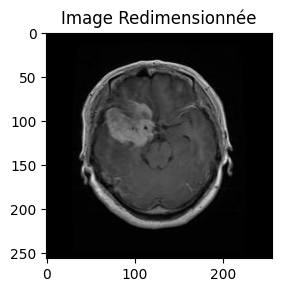

In [8]:
# Nouvelle taille pour redimensionner
target_size = (256, 256)

# Redimensionner la copie
img_resized = cv2.resize(im_yes_rgb, target_size)

plt.subplot(1, 2, 2)
plt.imshow(img_resized)
plt.title("Image Redimensionnée")

plt.show()


On a pas l'impression d'avoir perdu de l'information pour autant. La qualité de l'image est presque restée la meme. 

Nous mettons le reste de nos images à la meme taille 256x256 pour pouvoir utiliser des modeles pré-entrainés 

In [9]:
def resize_images_in_folder(folder_path, target_size):
    """
    Redimensionne les images dans un dossier à une taille cible, uniquement si nécessaire.
    
    Args:
    - folder_path : str : Le chemin du dossier contenant les images.
    - target_size : tuple : Taille cible (largeur, hauteur) pour redimensionner les images.
    """
    # Liste des fichiers dans le dossier
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]

    # Parcourir chaque fichier image dans le dossier
    for image_file in image_files:
        # Créer le chemin complet du fichier
        old_path = os.path.join(folder_path, image_file)

        # Ouvrir l'image
        with Image.open(old_path) as img:
            # Vérifier les dimensions actuelles
            if img.size == target_size:
                print(f"Aucune action nécessaire : {old_path} (dimensions correctes)")
                continue  # Passer à l'image suivante si les dimensions sont correctes
            
            # Redimensionner l'image
            img_resized = img.resize(target_size)
            
            # Enregistrer l'image redimensionnée (remplace l'image originale)
            img_resized.save(old_path)
            
            # Afficher l'action effectuée
            print(f"Image redimensionnée et enregistrée : {old_path}")


In [10]:
folder_path = "../data_set/all_data/yes/"  
target_size = (256, 256) 

resize_images_in_folder(folder_path, target_size)

In [13]:
folder_path = "../data_set/all_data//no/"  
target_size = (256, 256) 

resize_images_in_folder(folder_path, target_size)

Aucune action nécessaire : ../data_set/all_data//no/n_160.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_155.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_152.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_122.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_134.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_120.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_137.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_167.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_104.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_143.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_165.jpg (dimensions correctes)
Aucune action nécessaire : ../data_set/all_data//no/n_147.jpg (di

Les données sont néttoyés et bien nommées et toutes pretes pour l'entrainement

Nous allons maintenant diviser les données en données d'entrainement, en données de validation et données test.

In [14]:
import os
import shutil
import random
seed = 42
random.seed(seed)
# Chemins des répertoires
base_dir = '../data_set/all_data'
train_dir = '../data_set/train'
val_dir = '../data_set/val'
test_dir = '../data_set/test'

# Créer les répertoires nécessaires s'ils n'existent pas
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    os.makedirs(os.path.join(directory, 'yes'), exist_ok=True)
    os.makedirs(os.path.join(directory, 'no'), exist_ok=True)

# Fonction pour déplacer les fichiers
def split_data(source_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    # Parcours des sous-dossiers (yes et no)
    for label in ['yes', 'no']:
        # Chemin source et liste des images
        label_dir = os.path.join(source_dir, label)
        images = os.listdir(label_dir)
        random.shuffle(images)  # Mélanger les images
        
        # Calculer le nombre d'images pour chaque ensemble
        total_images = len(images)
        train_count = int(total_images * train_ratio)
        val_count = int(total_images * val_ratio)
        test_count = total_images - train_count - val_count

        # Déplacer les images dans train, val et test
        for i, image in enumerate(images):
            source_path = os.path.join(label_dir, image)

            if i < train_count:
                dest_dir = os.path.join(train_dir, label, image)
            elif i < train_count + val_count:
                dest_dir = os.path.join(val_dir, label, image)
            else:
                dest_dir = os.path.join(test_dir, label, image)

            shutil.move(source_path, dest_dir)  # Déplacer l'image

# Appeler la fonction pour répartir les images
split_data(base_dir)

print("Les images ont été réparties dans les répertoires 'train', 'val', et 'test'.")


Les images ont été réparties dans les répertoires 'train', 'val', et 'test'.


Resnet18 préentrainé

In [3]:
import sys
sys.path.append('../')  # Ajouter le répertoire parent au sys.path
print(sys.path)
import models.model_resnet18  # Maintenant on peut importer le fichier models.py


['/home/ing/Bureau/Bureau_/projets_personnels/brain_cancer/notebooks', '/home/ing/Bureau/Bureau_/Udem_concerns/Science_de_donnees_MILA/Projet_finale/milestone_2/ift6758-project-milestone2', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python39.zip', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/lib-dynload', '', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages', '/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/setuptools/_vendor', '../']


Preparer les données

In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Définir les transformations sur les images (redimensionnement, normalisation, etc.)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensionner l'image à 256x256
    transforms.ToTensor(),  # Convertir l'image en un tensor PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalisation
])

# Charger les données d'entraînement, validation et test en utilisant ImageFolder
train_data = datasets.ImageFolder(root='../data_set/train', transform=transform)

# Créer un DataLoader pour itérer sur les données par mini-lots
batch_size_ = 30
train_loader = DataLoader(train_data, batch_size=batch_size_, shuffle=True)
print(train_data)
# Exemple d'utilisation du DataLoader
for images, labels in train_loader:
    print(images.shape, labels.shape)  # Affiche la forme des tensors
    break


Dataset ImageFolder
    Number of datapoints: 126
    Root location: ../data_set/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
torch.Size([30, 3, 256, 256]) torch.Size([30])


Declarer le modele

In [13]:
# Initialiser le modèle
model = models.model_resnet18.ResNetBinaryClassifier(pretrained=True)  #Resnet18 préentrainé sur imagenet

/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Fonction de perte et optimiseur

In [7]:
import torch
import torch.nn as nn

# Fonction de perte pour la classification binaire
criterion = nn.BCELoss()  # Binary Cross Entropy Loss

# Optimiseur (par exemple, Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Taux d'apprentissage de 0.0001 et ajustement des poids du réseau


Entrainement

In [15]:
# Initialiser l'appareil (GPU ou CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # selon que nous disposons d'un GPU ou d'un CPU

# Déplacer le modèle sur l'appareil (la device) (GPU ou CPU)
model.to(device)

# Nombre d'époques pour l'entraînement
num_epochs = 12

# Boucle d'entraînement
for epoch in range(num_epochs):
    model.train()  # Mettre le modèle en mode entraînement
    
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Déplacer les données vers l'appareil
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Propagation avant
        outputs = model(inputs)
        
        # Calcul de la perte
        loss = criterion(outputs.squeeze(), labels.float())  # La sortie est une probabilité, donc squeeze pour la comparer avec labels
        
        # Rétropropagation
        loss.backward()
        
        # Mise à jour des poids
        optimizer.step()
        
        # Calcul de la perte et des prédictions
        running_loss += loss.item()
        predicted = (outputs > 0.5).float()  # Seuil à 0.5 pour la classification binaire
        
        
        predicted = predicted.view(-1).to(torch.int)
        correct_predictions += ((predicted == labels).sum().item())

        total_predictions += labels.size(0)

        
    # Afficher la perte et la précision à la fin de chaque époque
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    
    print(f'Époque {epoch+1}/{num_epochs}, Perte: {epoch_loss:.4f}, Précision: {epoch_accuracy:.4f}')


Époque 1/12, Perte: 0.4435, Précision: 0.8254
Époque 2/12, Perte: 0.0861, Précision: 0.9683
Époque 3/12, Perte: 0.0459, Précision: 1.0000
Époque 4/12, Perte: 0.0286, Précision: 1.0000
Époque 5/12, Perte: 0.0112, Précision: 1.0000
Époque 6/12, Perte: 0.0060, Précision: 1.0000
Époque 7/12, Perte: 0.0073, Précision: 1.0000
Époque 8/12, Perte: 0.0835, Précision: 0.9841
Époque 9/12, Perte: 0.0057, Précision: 1.0000
Époque 10/12, Perte: 0.0193, Précision: 0.9921
Époque 11/12, Perte: 0.0100, Précision: 1.0000
Époque 12/12, Perte: 0.0158, Précision: 1.0000


Sauvegarde du modèle

In [16]:
torch.save(model.state_dict(), '../saved_models/model_resnet18.pth')

Nous allons maintenant évalué le modèle sur les données de validations

In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torch import nn

def evaluate_model(batch_size, val_data_path, model, criterion, device, transform):
    """
    Évalue un modèle sur un ensemble de données de validation.

    Args:
        batch_size (int): Taille des mini-lots pour le DataLoader.
        val_data_path (str): Chemin vers le répertoire contenant les données de validation.
        model (nn.Module): Le modèle PyTorch à évaluer.
        criterion (nn.Module): La fonction de perte utilisée pour évaluer le modèle.
        device (torch.device): L'appareil (CPU ou GPU) pour exécuter l'évaluation.
        transform (callable): Transformations appliquées sur les données d'entrée.

    Returns:
        tuple: Moyenne des pertes, précision, toutes les sorties, toutes les étiquettes et toutes les prédictions.
    """
    # Charger les données de validation avec transformations
    val_data = datasets.ImageFolder(root=val_data_path, transform=transform)
    
    # Créer un DataLoader pour itérer sur les données de validation
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

    # Mettre le modèle en mode évaluation (désactive dropout, batchnorm, etc.)
    model.eval()

    # Initialisation des métriques
    validation_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_outputs = []      # Liste pour stocker toutes les sorties du modèle
    all_labels = []       # Liste pour stocker toutes les étiquettes
    all_predicted = []    # Liste pour stocker toutes les prédictions binaires

    # Désactiver la rétropropagation pour accélérer et économiser la mémoire
    with torch.no_grad():
        for inputs, labels in val_loader:
            # Déplacer les données vers l'appareil spécifié (CPU ou GPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Propagation avant
            outputs = model(inputs)

            # Calcul de la perte
            loss = criterion(outputs.squeeze(), labels.float())
            validation_loss += loss.item()

            # Seuil pour obtenir les prédictions binaires (0 ou 1)
            predicted = (outputs > 0.5).float()

            # Stocker les sorties, étiquettes et prédictions
            all_outputs.append(outputs.cpu())    # Sorties déplacées sur le CPU
            all_labels.append(labels.cpu())      # Étiquettes déplacées sur le CPU
            all_predicted.append(predicted.cpu())  # Prédictions binaires déplacées sur le CPU

            # Calculer le nombre de prédictions correctes
            correct_predictions += (predicted.view(-1).to(torch.int) == labels.to(torch.int)).sum().item()
            total_predictions += labels.size(0)

    # Concaténer toutes les sorties et étiquettes en un seul tensor
    all_outputs = torch.cat(all_outputs, dim=0)
    all_labels = torch.cat(all_labels, dim=0)
    all_predicted = torch.cat(all_predicted, dim=0)

    # Calculer la perte moyenne et la précision
    avg_validation_loss = validation_loss / len(val_loader)
    validation_accuracy = correct_predictions / total_predictions

    # Retourner les résultats
    return avg_validation_loss, validation_accuracy, all_outputs, all_labels, all_predicted


In [18]:
batch_size_ = 15
val_data_path = '../data_set/val'
model = model 
criterion = nn.BCEWithLogitsLoss()  #fonction de perte
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
avg_loss, accuracy, outputs,labels,predicted = evaluate_model(batch_size_, val_data_path, model, criterion, device,transform)

# Afficher les résultats
print(f'Validation - Perte moyenne: {avg_loss:.4f}, Précision: {accuracy:.4f}')

Validation - Perte moyenne: 0.5213, Précision: 1.0000


Métrics d'évaluation

Courbe ROC et AUC

    Nous allons traçer la courbe ROC :
        Cette courbe corresponds au taux de vrais positifs (True Positive Rate, TPR) en fonction du taux de faux positifs (False Positive Rate, FPR) à différents seuils de décision.
        Idéalement, une courbe ROC parfaite (modèle parfait) passerait par le coin supérieur gauche (TPR = 1, FPR = 0), indiquant que le modèle distingue parfaitement les classes.

    AUC (Area Under the Curve) :
        C'est l'aire sous la courbe ROC.
        Une AUC de 1.0 signifie une classification parfaite, tandis qu'une AUC de 0.5 indique une classification aléatoire (le modèle ne fait pas mieux que de deviner les labels)

In [19]:
print(outputs)

tensor([[9.0066e-04],
        [7.6778e-04],
        [3.3231e-02],
        [3.9928e-03],
        [4.8943e-03],
        [9.6526e-02],
        [2.7132e-05],
        [4.0676e-03],
        [9.7643e-01],
        [9.9947e-01],
        [9.9985e-01],
        [9.9966e-01],
        [1.0000e+00],
        [9.9998e-01],
        [9.9579e-01]])


In [20]:
from sklearn.metrics import roc_curve, auc
def courbe_roc(outputs, labels):

    predicted_proba = outputs.numpy().flatten()
    fpr, tpr, thresholds = roc_curve(labels, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='red', lw=1, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.text(0.5, 0.1, f'AUC = {roc_auc:.2f}', fontsize=12, color='black', ha='center')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonale (modèle aléatoire)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


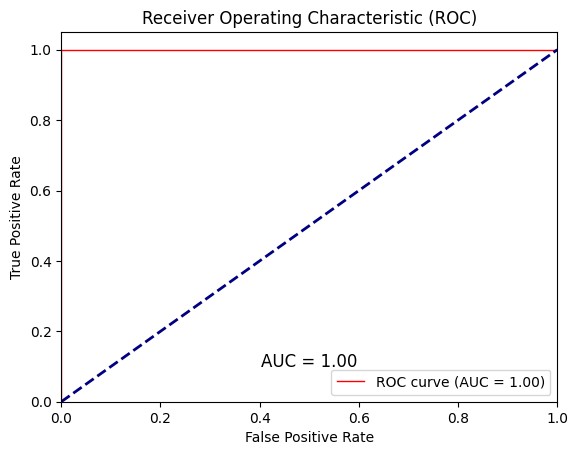

In [21]:
courbe_roc(outputs, labels)

Le AUC vaut 1, soit que notre modèle est parfait. Le résultat n'est pas surprenant car il s'agit d'un fine turning. Le modèle utilisé Resnet18 est déjà préentrainé à détecter les caractéristiques pertinentes comme les bords, les contours, les arretes etc...

Un ResNet préentraîné sur ImageNet est généralement plus performant pour des tâches comme la classification d'images IRM grâce à un concept clé : le transfert d'apprentissage.

 Apprentissage des caractéristiques générales

    Les couches convolutionnelles des réseaux comme ResNet apprennent des caractéristiques de bas niveau (bords, textures, motifs) dans les premières couches et des caractéristiques de haut niveau (objets ou structures) dans les couches plus profondes.
    ImageNet contient des millions d'images variées couvrant des milliers de classes. Le préentraînement sur ce dataset permet au réseau d'apprendre des caractéristiques visuelles générales qui sont également pertinentes pour d'autres types d'images, y compris les images IRM.

 Réduction du risque de surapprentissage

    Lorsqu’un modèle est entraîné à partir de zéro sur un dataset médical souvent petit, il risque de surapprendre en s'ajustant trop aux données d'entraînement.
    Un modèle préentraîné utilise les poids déjà optimisés d'ImageNet comme point de départ, ce qui permet de nécessiter moins de données spécifiques pour atteindre de bonnes performances.

Fine-tuning pour adapter les caractéristiques

    Les images IRM sont très différentes des images d'ImageNet (qui contiennent des objets du quotidien). Pendant le fine-tuning :
        Les couches initiales du ResNet, qui capturent des caractéristiques génériques comme des contours et textures, restent utiles et sont souvent congelées.
        Les couches profondes sont ajustées aux particularités des IRM, comme la structure des tissus ou des anomalies médicales.

POurquoi un modèle préentrainé : Efficacité d'entraînement

    En utilisant un modèle préentraîné, le processus d'entraînement devient plus rapide et nécessite moins de données annotées.
    Un modèle non préentraîné doit apprendre toutes les caractéristiques visuelles à partir de zéro, ce qui est inefficace et moins probable de converger correctement avec un dataset limité.

Teste du modèle.

In [22]:

batch_size_ = 18
val_data_path = '../data_set/test'
model = model 
criterion = nn.BCEWithLogitsLoss()  # fonction de perte
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
avg_loss, accuracy,outputs,labels,predicted = evaluate_model(batch_size_, val_data_path, model, criterion, device,transform)

# Afficher les résultats
print(f'Validation - Perte moyenne: {avg_loss:.4f}, Précision: {accuracy:.4f}')

Validation - Perte moyenne: 0.5808, Précision: 0.8889


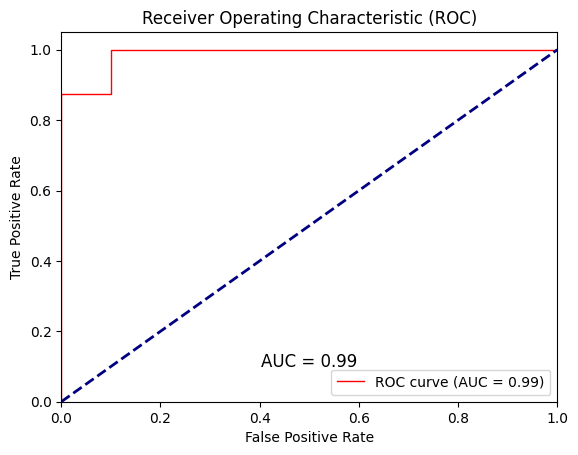

In [23]:
courbe_roc(outputs, labels)

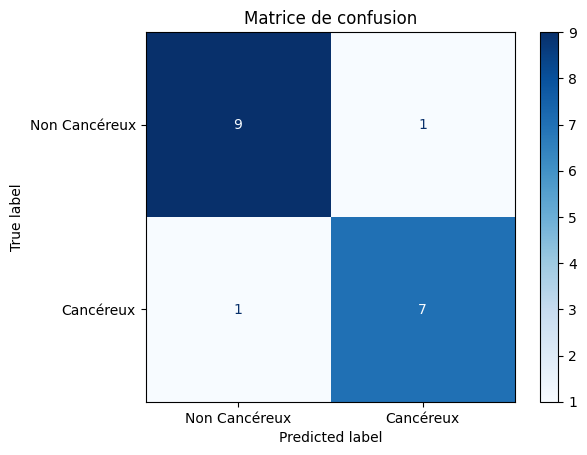

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, (outputs>0.5).int())

# 3. Affichage automatisé de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Cancéreux", "Cancéreux"])
disp.plot(cmap="Blues", values_format="d")  # Choix des couleurs et du format des valeurs
plt.title("Matrice de confusion")
plt.show()

In [26]:
print(outputs)

tensor([[0.0411],
        [0.0208],
        [0.0091],
        [0.0012],
        [0.0086],
        [0.0965],
        [0.0020],
        [0.0086],
        [0.9763],
        [0.1245],
        [0.9932],
        [0.9958],
        [0.9998],
        [0.9983],
        [0.9985],
        [0.9996],
        [0.2785],
        [1.0000]])


On peut voir sur cete matrice de confusion que le modèle fait une erreur sur une données.Mais celà ne remets pas en doute pour autant la robusteste du modèle.Cependant il peut bien s'agir d'un overfittig aussi.


Une idée simple qui vient à l'esprit est d'évaluer la certitude du modèle. Soit de passer à un seuil plus exigeant non pas de 0.5 mais de 0.8 par exemple pour voir le niveau de confiance des prédictions. 

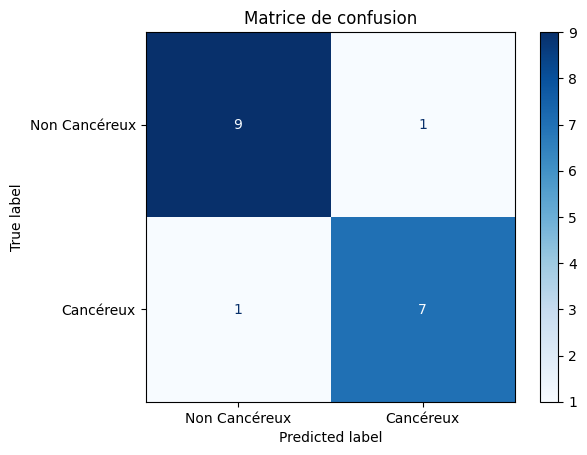

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, (outputs>0.8).int())

# 3. Affichage automatisé de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Cancéreux", "Cancéreux"])
disp.plot(cmap="Blues", values_format="d")  # Choix des couleurs et du format des valeurs
plt.title("Matrice de confusion")
plt.show()

Le modèle reste encore pour le moins assez convainquant car pour une hausse de 60% en certitude (seuil de 0.5 à 0.8), le modèle perd seulement 12.5% de précision (passage de 8 VP sur 8 à 7 VP sur 8)

In [28]:
batch_size_ = 100
val_data_path = '../data_set/new_data/new_val_resnet18'
model = model 
criterion = nn.BCEWithLogitsLoss()  # fonction de perte
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
avg_loss, accuracy,outputs,labels,predicted = evaluate_model(batch_size_, val_data_path, model, criterion, device,transform)

# Afficher les résultats
print(f'Validation - Perte moyenne: {avg_loss:.4f}, Précision: {accuracy:.4f}')

Validation - Perte moyenne: 0.4607, Précision: 0.7889


In [29]:
print(outputs)
len(outputs)

tensor([[0.8158],
        [0.0809],
        [0.0012],
        ...,
        [0.0478],
        [0.7912],
        [0.7225]])


2870

# Courbe ROC/AUC

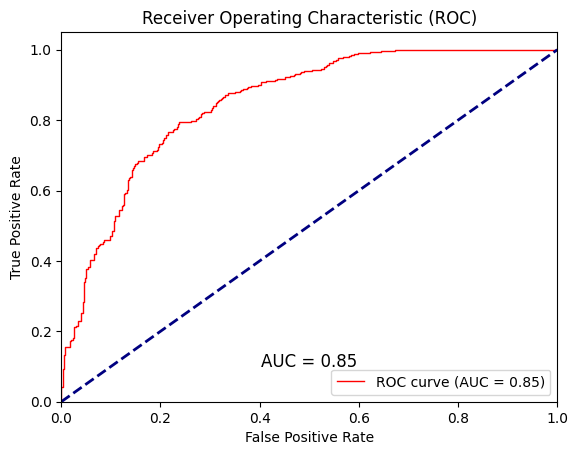

In [30]:
courbe_roc(outputs, labels)

# Matrice de confusion

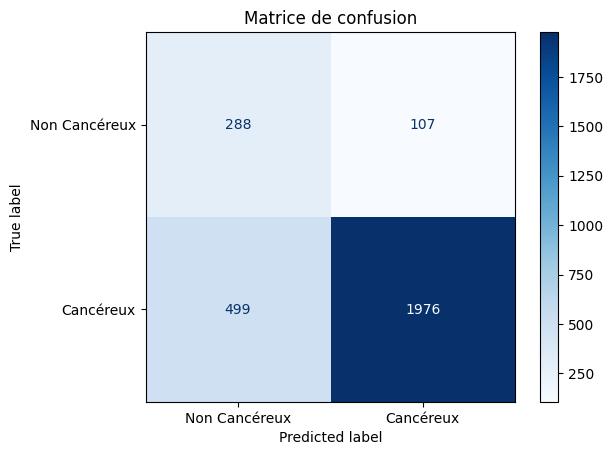

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, (outputs>0.5).int())

# 3. Affichage automatisé de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Cancéreux", "Cancéreux"])
disp.plot(cmap="Blues", values_format="d")  # Choix des couleurs et du format des valeurs
plt.title("Matrice de confusion")
plt.show()

In [35]:
print(outputs)
len(outputs)

tensor([[0.8158],
        [0.0809],
        [0.0012],
        ...,
        [0.0478],
        [0.7912],
        [0.7225]])


2870

Le modèle de classification binaire fait 20% d'erreur sur les prédictions positives et 20% sur les prédictions négatives, donc présente une précision globale de 80%, ce qui peut être considéré comme acceptable selon le contexte actuel. En effet le modèle est généraliste car entrainé à distiguer deux classes : malades et non malade/
Voici une analyse simplifiée pour évaluer sa robustesse :

Analyse du taux d'erreur :

    20% d'erreur sur les positifs signifie que parmi les échantillons positifs, le modèle se trompe dans 1 cas sur 5 (faux négatifs).
    20% d'erreur sur les négatifs signifie que parmi les échantillons négatifs, le modèle se trompe dans 1 cas sur 5 (faux positifs).
    POur un modèle d'aide à la décision par exemple, ces résultats sont acceptables.

Voyons le niveau de confiance du modèle

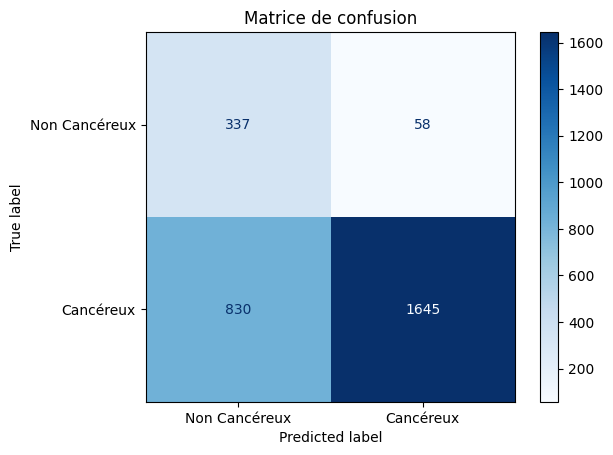

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, (outputs>0.7).int())

# 3. Affichage automatisé de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Cancéreux", "Cancéreux"])
disp.plot(cmap="Blues", values_format="d")  # Choix des couleurs et du format des valeurs
plt.title("Matrice de confusion")
plt.show()

Nous allons maintenant spécialiser le modèle à faire de la multiclassification. Le principe est simple. Nous allons adapté l'achitecture précédente avec quelques couches de plus pour permettre au modèle après avoir prédit positif ou négatif d'aller plus en détails si c'est positif.

 On va faire de la multiclassification.

In [5]:
# Initialiser le nouveau modèle
model_fine = models.model_resnet18.ResNetBinaryClassifier(pretrained=True)  #Resnet18 préentrainé sur imagenet
# Charger les poids sauvegardés
model_fine.load_state_dict(torch.load("../saved_models/model_resnet18.pth"))
# Vérification : afficher la structure du modèle
print(model_fine)

ResNetBinaryClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

/tmp/ipykernel_4821/54364772.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_fine.load_state_dict(torch.load("../saved_models/model_resnet18.pth"))


In [6]:
# Ajouter les couches supplémentaires correctement en accédant à self.resnet.fc
model_fine.resnet.fc = nn.Sequential(
    model_fine.resnet.fc,                 # Garder la couche FC de sortie binaire
    nn.Linear(1, 256),                    # Nouvelle couche FC avec 256 nœuds
    nn.ReLU(),                            # Activation ReLU
    nn.Linear(256, 128),                  # Deuxième couche FC avec 128 nœuds
    nn.ReLU(),                            # Activation ReLU
    nn.Linear(128, 4),                    # Dernière couche FC avec 4 nœuds
    nn.Softmax(dim=1)                     # Activation Softmax pour obtenir des probabilités sur 4 classes
)

# Vérification : Afficher la structure du modèle
print(model_fine)

print("Le modèle a été chargé, modifié et les couches supplémentaires ont été ajoutées avec succès.")


ResNetBinaryClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

 Pourquoi cette approche semble prometteuse ?

    Hiérarchisation naturelle : Les maladies partagent souvent des caractéristiques communes. L'étape binaire permet au modèle d'apprendre ces bases avant de se spécialiser.
    Réduction de la complexité : Un apprentissage progressif peut réduire la confusion entre classes similaires, car le modèle a déjà appris à séparer les grandes catégories.
    Réduction de l'effet des données déséquilibrées : En apprenant d'abord les distinctions globales, le modèle est moins influencé par des sous-classes rares dans les étapes initiales.

 Comment tester si cette méthode est meilleure ?

 Pour valider l'hypothèse, on pourrait comparer :

    Apprentissage direct : Un modèle qui apprend directement les classes spécifiques des maladies.
    Apprentissage progressif : notre approche, en deux étapes.

On mesurera des métriques comme :

    Précision globale, la perte.
    Matrice de confusion pour comprendre les erreurs par classe.
    Robustesse face à des données déséquilibrées.(images floutées)

In [4]:
glioma_folder_path = "../data_set/new_data/Training/glioma_tumor"
meningite_folder_path = "../data_set/new_data/Training/meningioma_tumor/"
pituitary_folder_path = "../data_set/new_data/Training/pituitary_tumor/"
rename_and_convert_images(glioma_folder_path, prefix="g")

Renommé et converti : gg (1).jpg -> g1.jpg
Renommé et converti : gg (10).jpg -> g2.jpg
Renommé et converti : gg (100).jpg -> g3.jpg
Renommé et converti : gg (101).jpg -> g4.jpg
Renommé et converti : gg (102).jpg -> g5.jpg
Renommé et converti : gg (103).jpg -> g6.jpg
Renommé et converti : gg (104).jpg -> g7.jpg
Renommé et converti : gg (105).jpg -> g8.jpg
Renommé et converti : gg (106).jpg -> g9.jpg
Renommé et converti : gg (107).jpg -> g10.jpg
Renommé et converti : gg (108).jpg -> g11.jpg
Renommé et converti : gg (109).jpg -> g12.jpg
Renommé et converti : gg (11).jpg -> g13.jpg
Renommé et converti : gg (110).jpg -> g14.jpg
Renommé et converti : gg (111).jpg -> g15.jpg
Renommé et converti : gg (112).jpg -> g16.jpg
Renommé et converti : gg (113).jpg -> g17.jpg
Renommé et converti : gg (114).jpg -> g18.jpg
Renommé et converti : gg (115).jpg -> g19.jpg
Renommé et converti : gg (116).jpg -> g20.jpg
Renommé et converti : gg (117).jpg -> g21.jpg
Renommé et converti : gg (118).jpg -> g22.jpg
R

In [5]:
rename_and_convert_images(meningite_folder_path, prefix="m")

Renommé et converti : m (10).jpg -> m1.jpg
Renommé et converti : m (100).jpg -> m2.jpg
Renommé et converti : m (101).jpg -> m3.jpg
Renommé et converti : m (102).jpg -> m4.jpg
Renommé et converti : m (103).jpg -> m5.jpg
Renommé et converti : m (104).jpg -> m6.jpg
Renommé et converti : m (105).jpg -> m7.jpg
Renommé et converti : m (106).jpg -> m8.jpg
Renommé et converti : m (107).jpg -> m9.jpg
Renommé et converti : m (108).jpg -> m10.jpg
Renommé et converti : m (109).jpg -> m11.jpg
Renommé et converti : m (11).jpg -> m12.jpg
Renommé et converti : m (110).jpg -> m13.jpg
Renommé et converti : m (111).jpg -> m14.jpg
Renommé et converti : m (112).jpg -> m15.jpg
Renommé et converti : m (113).jpg -> m16.jpg
Renommé et converti : m (114).jpg -> m17.jpg
Renommé et converti : m (115).jpg -> m18.jpg
Renommé et converti : m (116).jpg -> m19.jpg
Renommé et converti : m (117).jpg -> m20.jpg
Renommé et converti : m (118).jpg -> m21.jpg
Renommé et converti : m (119).jpg -> m22.jpg
Renommé et converti :

In [6]:
rename_and_convert_images(pituitary_folder_path, prefix="p")

Renommé et converti : p (1).jpg -> p1.jpg
Renommé et converti : p (10).jpg -> p2.jpg
Renommé et converti : p (100).jpg -> p3.jpg
Renommé et converti : p (101).jpg -> p4.jpg
Renommé et converti : p (102).jpg -> p5.jpg
Renommé et converti : p (103).jpg -> p6.jpg
Renommé et converti : p (104).jpg -> p7.jpg
Renommé et converti : p (105).jpg -> p8.jpg
Renommé et converti : p (106).jpg -> p9.jpg
Renommé et converti : p (107).jpg -> p10.jpg
Renommé et converti : p (108).jpg -> p11.jpg
Renommé et converti : p (109).jpg -> p12.jpg
Renommé et converti : p (11).jpg -> p13.jpg
Renommé et converti : p (110).jpg -> p14.jpg
Renommé et converti : p (111).jpg -> p15.jpg
Renommé et converti : p (112).jpg -> p16.jpg
Renommé et converti : p (113).jpg -> p17.jpg
Renommé et converti : p (114).jpg -> p18.jpg
Renommé et converti : p (115).jpg -> p19.jpg
Renommé et converti : p (116).jpg -> p20.jpg
Renommé et converti : p (117).jpg -> p21.jpg
Renommé et converti : p (118).jpg -> p22.jpg
Renommé et converti : p

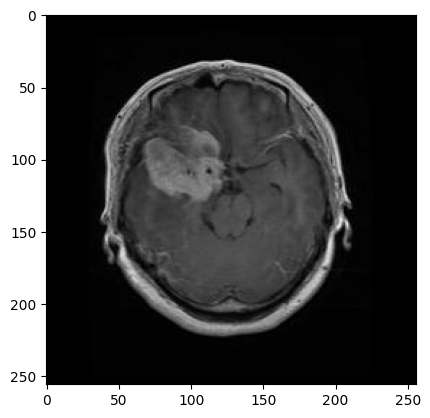

In [39]:
# lecture de l'image dans une matrice numpy 
im_m1 = cv2.imread("../data_set/new_data/Training/meningioma_tumor/m1.jpg")
# Convertir BGR (OpenCV) en RGB (Matplotlib)
im_m1_rgb = cv2.cvtColor(im_yes, cv2.COLOR_BGR2RGB)

# Afficher l'image
plt.imshow(im_m1_rgb)
plt.show()


In [11]:
# Définir les transformations sur les images (redimensionnement, normalisation, etc.)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensionner l'image à 256x256
    transforms.ToTensor(),  # Convertir l'image en un tensor PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalisation
])

# Charger les données d'entraînement
train_data = datasets.ImageFolder(root='../data_set/new_data/Training', transform=transform)

# Créer un DataLoader pour itérer sur les données par mini-lots
batch_size_ = 180
train_loader = DataLoader(train_data, batch_size=batch_size_, shuffle=True)
print(train_data)

Dataset ImageFolder
    Number of datapoints: 2870
    Root location: ../data_set/new_data/Training
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [12]:
# Fonction de perte pour la classification binaire
criterion = nn.CrossEntropyLoss()

# Optimiseur (par exemple, Adam)
optimizer = torch.optim.Adam(model_fine.parameters(), lr=0.0001) 

Entrainement

Époque 1/10, Perte: 1.3473, Précision: 0.4617
Époque 2/10, Perte: 1.3062, Précision: 0.5523
Époque 3/10, Perte: 1.2966, Précision: 0.6955
Époque 4/10, Perte: 1.2903, Précision: 0.8115
Époque 5/10, Perte: 1.2849, Précision: 0.8362
Époque 6/10, Perte: 1.2792, Précision: 0.8495
Époque 7/10, Perte: 1.2720, Précision: 0.8564
Époque 8/10, Perte: 1.2625, Précision: 0.9031
Époque 9/10, Perte: 1.2538, Précision: 0.9683
Époque 10/10, Perte: 1.2458, Précision: 0.9892


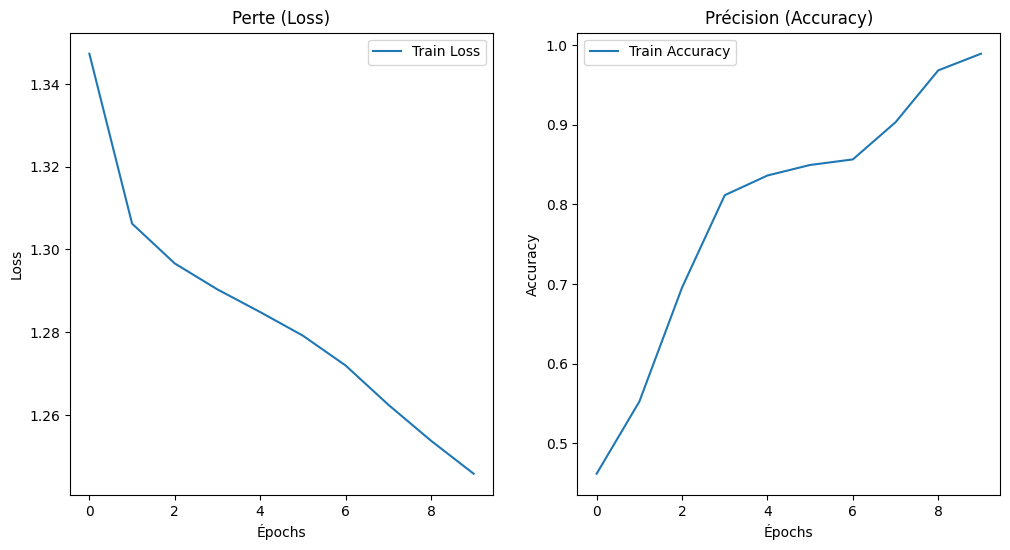

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model_fine.to(device)

num_epochs = 10

# Liste pour stocker la perte (loss) et la précision (accuracy)
train_losses = []
train_accuracies = []

# Boucle d'entraînement
for epoch in range(num_epochs):
    model_fine.train()  # Mettre le modèle en mode entraînement
    
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Déplacer les données vers l'appareil
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Propagation avant
        outputs = model_fine(inputs)
        
        # Calcul de la perte
        loss = criterion(outputs, labels)  # Pas besoin de .squeeze() ici, la perte est calculée directement avec CrossEntropyLoss
        
        # Rétropropagation
        loss.backward()
        
        # Mise à jour des poids
        optimizer.step()
        
        # Calcul de la perte et des prédictions
        running_loss += loss.item()
        
        # Prédictions : nous obtenons les indices des classes avec les plus grandes probabilités
        _, predicted = torch.max(outputs, 1)  # Retourne les indices des classes les plus probables
        
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    # Calcul de la perte et de la précision pour cette époque
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions

    # Ajouter les résultats dans les listes
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Époque {epoch+1}/{num_epochs}, Perte: {epoch_loss:.4f}, Précision: {epoch_accuracy:.4f}')

# Tracer les courbes après l'entraînement
plt.figure(figsize=(12, 6))

# Courbes de perte
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Perte (Loss)')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

# Courbes de précision
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.title('Précision (Accuracy)')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [14]:
torch.save(model_fine.state_dict(), '../saved_models/model_fine_resnet18.pth')

In [21]:
print(outputs)

tensor([[0.5004, 0.7308, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5056, 0.7266],
        [0.7014, 0.5291, 0.5041, 0.5033],
        [0.5002, 0.7309, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5168, 0.7176],
        [0.5002, 0.7309, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5092, 0.7238],
        [0.7017, 0.5284, 0.5042, 0.5035],
        [0.5265, 0.5081, 0.6388, 0.5723],
        [0.5000, 0.5000, 0.5084, 0.7244],
        [0.7030, 0.5247, 0.5055, 0.5044],
        [0.5000, 0.5000, 0.5024, 0.7292],
        [0.5000, 0.5000, 0.5051, 0.7270],
        [0.7030, 0.5246, 0.5056, 0.5044],
        [0.5051, 0.7270, 0.5000, 0.5000],
        [0.7032, 0.5234, 0.5061, 0.5048],
        [0.5284, 0.5086, 0.6385, 0.5702],
        [0.5000, 0.5000, 0.5131, 0.7206],
        [0.5005, 0.7307, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5060, 0.7263],
        [0.7013, 0.5294, 0.5040, 0.5033],
        [0.5000, 0.5000, 0.5061, 0.7262],
        [0.5000, 0.5000, 0.5043, 0.7276],
        [0.5023, 0.7292, 0.5000, 0

Modele Testing

In [10]:
def evaluate_2(model, test_data_path, criterion, transform, batch_size, device):
    """
    Fonction pour évaluer un modèle sur des données de test.

    Args:
        model: Le modèle PyTorch à évaluer.
        test_data_path: Chemin vers les données de test.
        criterion: Fonction de perte utilisée (par exemple, nn.CrossEntropyLoss()).
        transform: Transformations à appliquer aux données (par exemple, redimensionnement, normalisation).
        batch_size: Taille des lots pour l'évaluation.
        device: Dispositif d'exécution ('cuda' ou 'cpu').

    Returns:
        average_test_loss: Perte moyenne sur les données de test.
        test_accuracy: Précision moyenne sur les données de test.
        all_outputs: Liste des sorties du modèle.
        all_predictions: Liste des prédictions du modèle.
    """

    # Charger les données de test
    test_data = datasets.ImageFolder(root=test_data_path, transform=transform)

    # Créer un DataLoader pour les données de test
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    # Mettre le modèle en mode évaluation
    model.eval()

    # Variables pour calculer la perte et la précision
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_outputs = []
    all_predictions = []
    all_labels = []
    # Désactiver la rétropropagation
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Déplacer les données vers l'appareil

            # Propagation avant
            outputs = model(inputs)
            all_outputs.append(outputs)  # Accumuler les sorties

            # Calcul de la perte
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Prédictions : indices des classes avec les plus grandes probabilités
            _, predicted = torch.max(outputs, 1)
            all_predictions.append(predicted)  # Accumuler les prédictions

            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)
            all_labels.append(labels)

    # Calcul des métriques
    average_test_loss = test_loss / len(test_loader)
    test_accuracy = correct_predictions / total_predictions

    # Concaténer les sorties et prédictions en un seul tenseur
    all_outputs = torch.cat(all_outputs, dim=0).cpu()
    all_predictions = torch.cat(all_predictions, dim=0).cpu()

    print(f'Perte sur le jeu de test: {average_test_loss:.4f}')
    print(f'Précision sur le jeu de test: {test_accuracy:.4f}')

    return average_test_loss, test_accuracy, all_labels, all_outputs, all_predictions


In [5]:
# Initialiser le nouveau modèle
model_fine = models.model_resnet18.CustomResNetClassifier(pretrained=True)  
# Charger les poids sauvegardés
model_fine.load_state_dict(torch.load("../saved_models/model_fine_resnet18.pth"))
# Vérification : afficher la structure du modèle
print(model_fine)

/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CustomResNetClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

/tmp/ipykernel_4032/113133644.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_fine.load_state_dict(torch.load("../saved_models/model_fine_resnet18.pth"))


In [17]:
model = model_fine
test_data_path = "../data_set/new_data/Testing"
criterion = nn.CrossEntropyLoss()
transform = transform
batch_size = 90
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Charger les données d'entraînement
test_data = datasets.ImageFolder(root=test_data_path, transform=transform)

# Créer un DataLoader pour itérer sur les données par mini-lots
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
print(test_data[0])

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -

In [11]:
average_test_loss, test_accuracy,all_labels, all_outputs, all_predictions = evaluate_2(model, test_data_path, criterion, transform, batch_size, device)

Perte sur le jeu de test: 1.2821
Précision sur le jeu de test: 0.8579


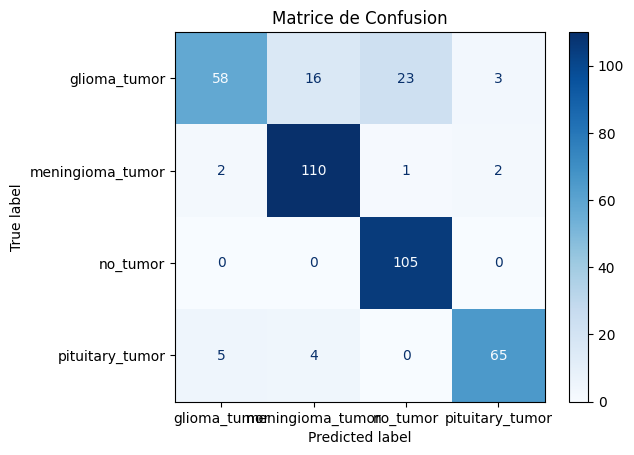

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convertir les étiquettes et les prédictions en un seul tableau
true_labels = torch.cat(all_labels, dim=0).cpu().numpy()
predicted_labels = all_predictions.numpy()

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_data.classes)
disp.plot(cmap=plt.cm.Blues)  # Utilisation d'un schéma de couleurs
plt.title("Matrice de Confusion")
plt.show()


On va maintenant travailler sur le meme réseau de neuronne mais qui n'a pas été entrainé sur les images binaires classées malade ou non.

In [19]:
# Initialiser le nouveau modèle
model_not_fine = models.model_resnet18.CustomResNetClassifier(pretrained=True)  
# Charger les poids sauvegardés
#model_fine.load_state_dict(torch.load("../saved_models/model_fine_resnet18.pth")) Ici on travaillera sur un reseau jamais entrainé à la classification binaire.
# Vérification : afficher la structure du modèle
print(model_not_fine)

CustomResNetClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ing/Logiciels/anaconda/envs/ift6758-conda-env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [20]:
# Fonction de perte pour la classification binaire
criterion = nn.CrossEntropyLoss()

# Optimiseur (par exemple, Adam)
optimizer = torch.optim.Adam(model_not_fine.parameters(), lr=0.0001) 

In [21]:
# Définir les transformations sur les images (redimensionnement, normalisation, etc.)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Redimensionner l'image à 256x256
    transforms.ToTensor(),  # Convertir l'image en un tensor PyTorch
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalisation
])

# Charger les données d'entraînement
train_data = datasets.ImageFolder(root='../data_set/new_data/Training', transform=transform)

# Créer un DataLoader pour itérer sur les données par mini-lots
batch_size_ = 180
train_loader = DataLoader(train_data, batch_size=batch_size_, shuffle=True)
print(train_data)

Dataset ImageFolder
    Number of datapoints: 2870
    Root location: ../data_set/new_data/Training
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


Époque 1/10, Perte: 1.3685, Précision: 0.4251
Époque 2/10, Perte: 1.3188, Précision: 0.5139
Époque 3/10, Perte: 1.3008, Précision: 0.6167
Époque 4/10, Perte: 1.2888, Précision: 0.8150
Époque 5/10, Perte: 1.2773, Précision: 0.8509
Époque 6/10, Perte: 1.2670, Précision: 0.8571
Époque 7/10, Perte: 1.2586, Précision: 0.8585
Époque 8/10, Perte: 1.2513, Précision: 0.8686
Époque 9/10, Perte: 1.2454, Précision: 0.9707
Époque 10/10, Perte: 1.2395, Précision: 0.9979


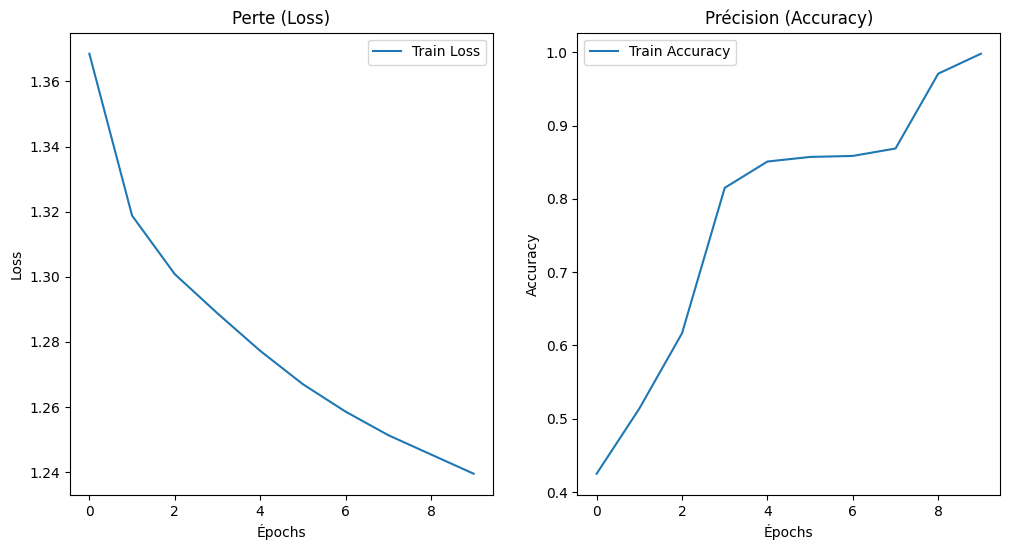

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model_not_fine.to(device)

num_epochs = 10

# Liste pour stocker la perte (loss) et la précision (accuracy)
train_losses = []
train_accuracies = []

# Boucle d'entraînement
for epoch in range(num_epochs):
    model_not_fine.train()  # Mettre le modèle en mode entraînement
    
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Déplacer les données vers l'appareil
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Propagation avant
        outputs = model_not_fine(inputs)
        
        # Calcul de la perte
        loss = criterion(outputs, labels)  # Pas besoin de .squeeze() ici, la perte est calculée directement avec CrossEntropyLoss
        
        # Rétropropagation
        loss.backward()
        
        # Mise à jour des poids
        optimizer.step()
        
        # Calcul de la perte et des prédictions
        running_loss += loss.item()
        
        # Prédictions : nous obtenons les indices des classes avec les plus grandes probabilités
        _, predicted = torch.max(outputs, 1)  # Retourne les indices des classes les plus probables
        
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    # Calcul de la perte et de la précision pour cette époque
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions

    # Ajouter les résultats dans les listes
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Époque {epoch+1}/{num_epochs}, Perte: {epoch_loss:.4f}, Précision: {epoch_accuracy:.4f}')

# Tracer les courbes après l'entraînement
plt.figure(figsize=(12, 6))

# Courbes de perte
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Perte (Loss)')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

# Courbes de précision
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.title('Précision (Accuracy)')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [26]:
torch.save(model_not_fine.state_dict(), '../saved_models/model_not_fine_resnet18.pth')

In [27]:
model = model_not_fine
test_data_path = "../data_set/new_data/Testing"
criterion = nn.CrossEntropyLoss()
transform = transform
batch_size = 90
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Charger les données d'entraînement
test_data = datasets.ImageFolder(root=test_data_path, transform=transform)

# Créer un DataLoader pour itérer sur les données par mini-lots
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
print(test_data[0])

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -

In [28]:
average_test_loss, test_accuracy,all_labels, all_outputs, all_predictions = evaluate_2(model, test_data_path, criterion, transform, batch_size, device)

Perte sur le jeu de test: 1.3114
Précision sur le jeu de test: 0.7107


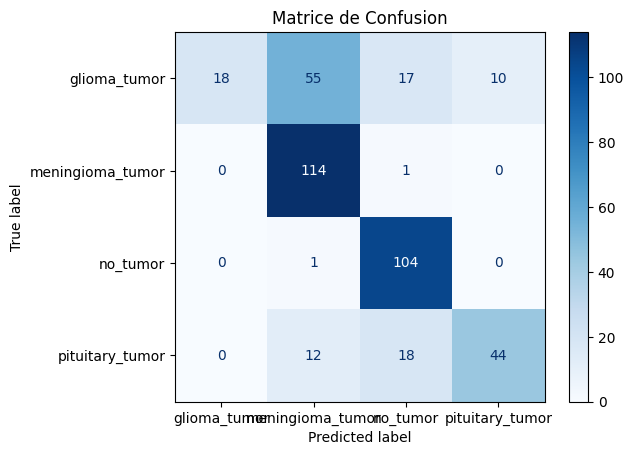

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convertir les étiquettes et les prédictions en un seul tableau
true_labels = torch.cat(all_labels, dim=0).cpu().numpy()
predicted_labels = all_predictions.numpy()

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_data.classes)
disp.plot(cmap=plt.cm.Blues)  # Utilisation d'un schéma de couleurs
plt.title("Matrice de Confusion")
plt.show()


On peut voir d'après les courbes de la perte et de la precision que les deux modèles sembles aficher des performances similaires lors de l'entrainement, mais les résultats du test (matrices de confusions) montres bien que le modèle_fine réalise une bien meilleure classification que le second model.